# Labolatorium 6
Piotr Kuchta, Sebastian Soczawa

Zadanie 1: Obliczanie całki korzystając z kwadratur prostokątów, trapezów i Simpsona.

Na początku importujemy potrzebne biblioteki

In [1]:
import numpy as np
import scipy.integrate as integrate
from math import pi as PI
from math import log
import matplotlib.pyplot as plt

Definiujemy funkcję pomocniczą zwracającą wartość badanej funkcji w punkcie.


In [2]:
def f1(x):
    return 4/(1 + x*x)

Definiujemy funkcję odpowiedzialną za obliczanie wartości całki metodą prostokątów.

In [3]:
def integrate_rectangle(f, start, end, no_points):
    i = start
    output = 0.0
    interval = (end - start)/ no_points
    while i < end:
        output += interval*f(i+interval/2) if i + interval < end else (end-i)*f(i+interval/2)
        i += interval
    return output

 Dla każdej metody przygotowywujemy tablice do przechowywania błędów i wartości. Z pomocą funkcji bibliotecznych oraz własnej funkcji obliczamy odpowiednie całki.

In [4]:
y_M = np.zeros(26)
y_T = np.zeros(26)
y_S = np.zeros(26)
err_M = []
err_T = []
err_S = []
hs = []
for m in range(1, 26):
    x_space = np.linspace(0, 1, 2**m + 1)
    y_space = np.array([f1(x) for x in x_space])
    hs.append( 1/(2**m+1))
    y_M[m] = integrate_rectangle(f1, 0, 1, 2**m + 1)
    y_T[m] = integrate.trapz(y_space, x_space)
    y_S[m] = integrate.simps(y_space, x_space)
    print("m =", m, "M :", y_M[m], ", T : ", y_T[m], ", S : ", y_S[m])
    err_M.append(abs(PI - y_M[m])/PI)
    err_T.append(abs(PI - y_T[m])/PI)
    err_S.append(abs(PI - y_S[m])/PI)

m = 1 M : 3.150849209865603 , T :  3.1 , S :  3.1333333333333333
m = 2 M : 3.144925864003328 , T :  3.131176470588236 , S :  3.1415686274509804
m = 3 M : 3.1426214565576114 , T :  3.1389884944910893 , S :  3.1415925024587064
m = 4 M : 3.1418810041445324 , T :  3.140941612041389 , S :  3.141592651224822
m = 5 M : 3.1416691763921034 , T :  3.1414298931749745 , S :  3.141592653552836
m = 6 M : 3.14161237745565 , T :  3.1415519634856555 , S :  3.141592653589216
m = 7 M : 3.141597661301665 , T :  3.141582481063752 , S :  3.1415926535897842
m = 8 M : 3.1415939152793566 , T :  3.141590110458283 , S :  3.141592653589793
m = 9 M : 3.1415929702430603 , T :  3.1415920178069157 , S :  3.141592653589793
m = 10 M : 3.1415927329076556 , T :  3.141592494644074 , S :  3.141592653589793
m = 11 M : 3.141592673438734 , T :  3.1415926138533634 , S :  3.141592653589793
m = 12 M : 3.141592658554443 , T :  3.1415926436556862 , S :  3.141592653589793
m = 13 M : 3.1415926548312436 , T :  3.141592651106266 , S :

Dla każdej metody wypisujemy wartość błędu minimalnego oraz rysujemy wykres błędów względnych. Oraz wyznaczamy hmin.

hmin - prostokąty 2.38e-07
hmin - trapezy 1.19e-07
hmin - Simpson 0.00389


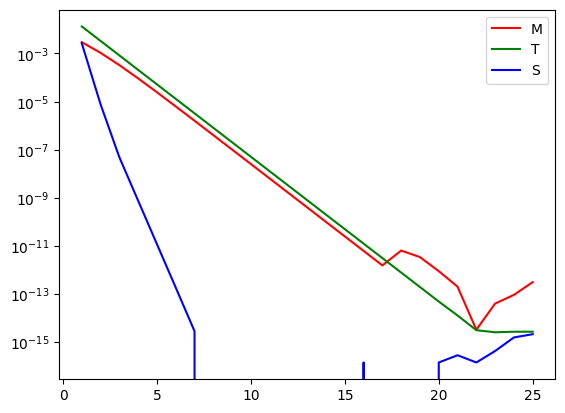

In [5]:
hmin_m = hs[err_M.index(min(err_M))]
hmin_t = hs[err_T.index(min(err_T))]
hmin_s = hs[err_S.index(min(err_S))]
print("hmin - prostokąty", "{:.3}".format(hmin_m))
print("hmin - trapezy", "{:.3}".format(hmin_t))
print("hmin - Simpson", "{:.3}".format(hmin_s))
m_tab = [i for i in range(1, 26)]
plt.semilogy()
plt.plot(m_tab, err_M, color='r', label="M")
plt.plot(m_tab, err_T, color='g', label="T")
plt.plot(m_tab, err_S, color='b', label="S")
plt.legend()
plt.show()

Obliczamy empiryczny błąd zbieżności.

In [6]:
th_mid = log(err_M[5]/err_M[4])/log(hs[5]/hs[4])
th_tra = log(err_T[5]/err_T[4])/log(hs[5]/hs[4])
th_sim = log(err_S[5]/err_S[4])/log(hs[5]/hs[4])
print("Rząd zbieżności empiryczny - prostokąty", round(th_mid, 2))
print("Rząd zbieżności empiryczny - trapezy", round(th_tra, 2))
print("Rząd zbieżności empiryczny - Simpson", round(th_sim, 2))

Rząd zbieżności empiryczny - prostokąty 2.0
Rząd zbieżności empiryczny - trapezy 2.05
Rząd zbieżności empiryczny - Simpson 6.14


Jak możemy zauważyć najszybciej błąd maleje przy użyciu kwadratury Simpsona. Kwadratury prostokątów i trapezów zbiegają do poprawnego wyniku w podobny sposób. Warto zauważyć że wartość hmin jest porównywalna do wartości wyznaczonej w laboratorium 1. Empiryczny rząd zbieżności dla kwadratury prostokątów oraz trapezów pokrywa się z teoretycznym i wynosi p = 2. Odmienna sytuacja występuje dla kwadratury Simpsona gdzie rząd zbieżnośći teoretyczny powinien wynosić p = 5. W naszym przypadku p = 6.

# Zadanie 2

Obliczanie całki przy użyciu kwadratury Gaussa-Legendra

Do obliczenia całki posłużyliśmy się gotową funkcją z biblioteki numpy, która zwraca węzły oraz wagi dla wielomianu Gaussa-Legendra

Wyniki są dla przedziału [-1, 1], więc musimy go przetransformować

In [7]:
r = (-1, 1)

In [8]:
def gauss_legendre(f: callable, a, b, n):
    # Calculate the nodes and weights of the Gauss-Legendre quadrature
    nodes, weights = np.polynomial.legendre.leggauss(n)

    # Map the nodes 
    mapped_nodes = ((b - a) * nodes + b*r[1] - a*r[0]) / (r[1] - r[0])
    mapped_weights = (b - a) / (r[1] - r[0]) * weights
    
    # Calculate the integral
    integral = sum(mapped_weights * f(mapped_nodes))
    
    return integral


Powyższa funkcja liczy całkę dla zadanego przedziału i zadanego n

Następnie obliczamy błąd

In [9]:
err = []
n_space = []
for n in range(1, 10):
    err.append(abs(integrate.fixed_quad(f1, 0, 1, n=2**n+1)[0] - PI)/(PI))
    n_space.append(n)


I umieszczamy wyniki na razem z funkcjami z podpunktu a

<function matplotlib.pyplot.show(close=None, block=None)>

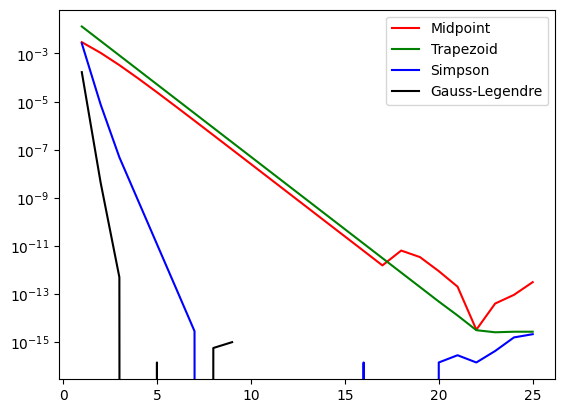

In [10]:

plt.semilogy()
plt.plot(m_tab, err_M, color='r', label="Midpoint")
plt.plot(m_tab, err_T, color='g', label="Trapezoid")
plt.plot(m_tab, err_S, color='b', label="Simpson")
plt.plot(n_space, err, color="black", label="Gauss-Legendre")
plt.legend()
plt.show


# Wnioski

Dla n = 11 błąd numeryczny zaczyna przeważać nad błędem metody. Dla kwadratury Simpsona n wynosi 7, natomiast dla Gauss-Legendre 3.  Obliczanie wyniku metodą Gaussa-Legendre'a trwa znacznie krócej z racji zastosowanych wielomianów ortogonalnych.